In [38]:
import cv2
import os
import matplotlib.pyplot as plt
from time import time,sleep

from googleapiclient.discovery import build
from google.oauth2 import service_account
from googleapiclient.http import MediaIoBaseUpload
import io

In [2]:
SCOPES = ['https://www.googleapis.com/auth/drive']
SERVICE_ACCOUNT_FILE = 'siamuniversity-77050aa882ce.json'
PARENT_FOLDER_ID = "1Y9IGBm1-03rV4LQv7J69G6K4sA9rL3FM"

def authenticate():
    creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
    return creds

def upload_photo(file_path):
    # print(file_path.split('\\')[-1])
    creds = authenticate()
    service = build('drive','v3',credentials=creds)

    file_metadata = {
        'name':file_path.split('\\')[-1],
        'parents':[PARENT_FOLDER_ID]
    }

    file = service.files().create(
        body = file_metadata,
        media_body = file_path
    ).execute()


In [39]:
input_video_path = "C://Users//Acer//Desktop//siam project//fullvideo.mp4"
output_dir = "output_frames"
os.makedirs(output_dir, exist_ok=True)
cap = cv2.VideoCapture(input_video_path)

In [41]:
# Get framerate
Fps = int(cap.get(cv2.CAP_PROP_FPS))                   # Frame/sec     25 frame/sec
# All frame of video
Afm = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))       # video length 343 sec
# length of video
duration = Afm//Fps
# print(f"{duration} sec")
# Frame capture every x min
# Cap_every_x_min = 0.5
Cap_every_x_min = 1
Fps = 1
Fxmin = (Fps*60)*Cap_every_x_min
# Fxmin = 100


print(f"Frame rate: {Fps}")
print(f"Total frames: {Afm}")
print(f"Video duration: {duration:.2f} seconds or {duration/(Fps*2)} min")
print(f"Frames to capture every {Cap_every_x_min} minutes: {Fxmin} frame")
print(f"We're going to capture every {Fxmin} frames, which means every {Cap_every_x_min} minutes we save 1 image.")
print(f"We're gonno got {Afm//Fxmin}")

Frame rate: 1
Total frames: 161988
Video duration: 5585.00 seconds or 2792.5 min
Frames to capture every 1 minutes: 60 frame
We're going to capture every 60 frames, which means every 1 minutes we save 1 image.
We're gonno got 2699


In [ ]:
def upload_photo(image_data, frame_no):
    # print(file_path.split('\\')[-1])
    creds = authenticate()
    service = build('drive','v3',credentials=creds)

    file_metadata = {
        'name':f'{frame_no}.jpg',
        'parents':[PARENT_FOLDER_ID]
    }

    media = MediaIoBaseUpload(io.BytesIO(image_data),mimetype='image/jpeg')


    file = service.files().create(
        body = file_metadata,
        media_body = media
    ).execute()

In [7]:
# frame_to_capture = list(range(0,Afm,Fxmin))
# h = 12
# m = 0
# s = 0
# for frame_no in frame_to_capture:
#     if m > 59:
#         h = h+1
#         m = 0
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
#     ret, frame = cap.read()
#     print(f"073124_{h}{m:02}{s:02}")
#     plt.imshow(frame)
#     plt.show()

#     # # Save to local
#     # output_path = os.path.join(
#     #     output_dir, 
#     #     f"073124_{h}{m:02}{s:02}.jpg"
#     #     )
#     # cv2.imwrite(output_path,frame)  


#     # # Upload to google drive
#     # if ret:
#     #     ret, buffer = cv2.imencode('.jpg',frame)
#     #     if ret:
#     #         upload_photo(buffer.tobytes(),f"073124_{h}{m:02}{s:02}")
#     # m = m + Cap_every_x_min

In [58]:
import cv2
import csv

0000.jpg 12:00:00


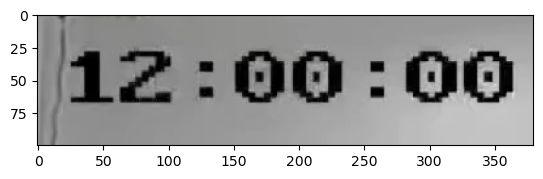

0001.jpg 12:00:01


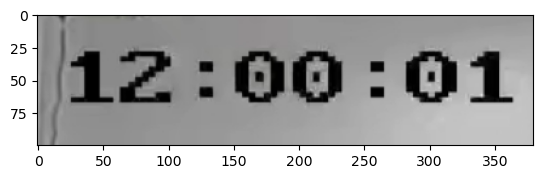

0002.jpg 12:00:02


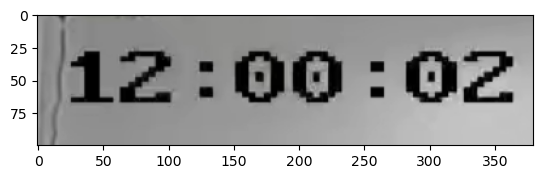

0003.jpg 12:00:03


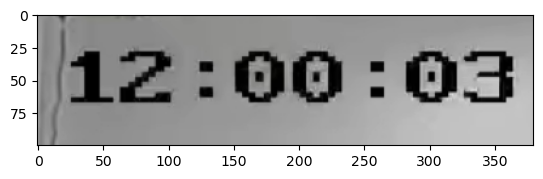

0004.jpg 12:00:04


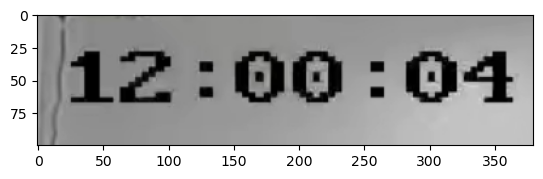

0005.jpg 12:00:05


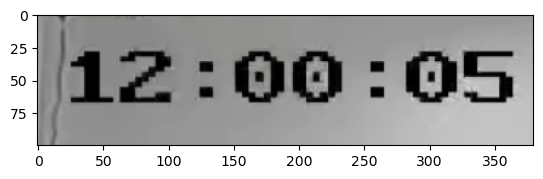

0006.jpg 12:00:06


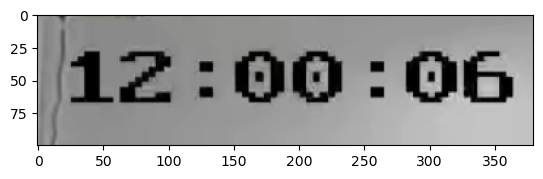

0007.jpg 12:00:07


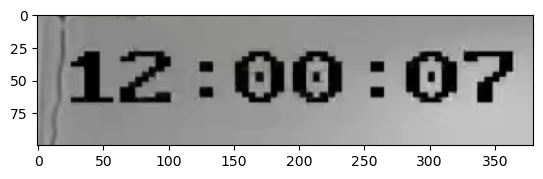

0008.jpg 12:00:08


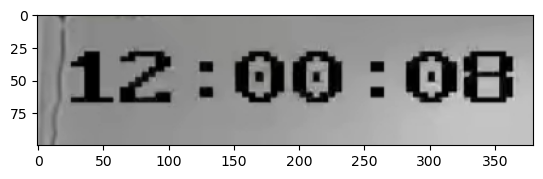

0009.jpg 12:00:09


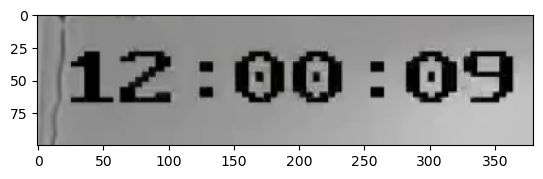

0010.jpg 12:00:10


KeyboardInterrupt: 

In [57]:
frame_to_capture = list(range(0,Afm,30))
c = 0
h = 12
m = 0
s = 0
for frame_no in frame_to_capture:
    if s >= 60:
        m = m + 1
        s = s-60
    if m > 59:
        h = h+1
        m = 0
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    ret, frame = cap.read()
    img_id = f"{c:04}.jpg"
    img_time = f"{h}:{m:02}:{s:02}"
    print(img_id,img_time)
    frame = frame[100:200,720:1100]
    plt.imshow(frame)
    plt.show()
    s = s + 1
    # # Save to local
    # output_path = os.path.join(
    #     output_dir, 
    #     f"073124_{h}{m:02}{s:02}.jpg"
    #     )
    # cv2.imwrite(output_path,frame)  


    # # Upload to google drive
    # if ret:
    #     ret, buffer = cv2.imencode('.jpg',frame)
    #     if ret:
    #         upload_photo(buffer.tobytes(),f"073124_{h}{m:02}{s:02}")
    # m = m + Cap_every_x_min
    c = c+ 1

In [62]:
# Initialize variables
frame_to_capture = list(range(0, Afm, 30))
# frame_to_capture = [0,30,60,90,120]
c = 0
h = 12
m = 0
s = 0

# Open the CSV file for writing
with open('output.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['img_id', 'img_time'])

    for frame_no in frame_to_capture:
        if s >= 60:
            m += 1
            s -= 60
        if m > 59:
            h += 1
            m = 0

        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        if not ret:
            break  # Stop if the frame is not read correctly

        img_id = f"{c:04}.jpg"
        img_time = f"{h}:{m:02}:{s:02}"
        print(img_id, img_time)

        # Write the img_id and img_time to the CSV file
        writer.writerow([img_id, img_time])

        # Crop and display the frame
        frame = frame[100:200, 720:1100]
        # plt.imshow(frame)
        # plt.show()

        s += 1
        c += 1  # Increment the counter for img_id
        # Save to local
        output_path = os.path.join(
            output_dir, 
            img_id
            )
        cv2.imwrite(output_path,frame) 

0000.jpg 12:00:00
0001.jpg 12:00:01
0002.jpg 12:00:02
0003.jpg 12:00:03
0004.jpg 12:00:04
0005.jpg 12:00:05
0006.jpg 12:00:06
0007.jpg 12:00:07
0008.jpg 12:00:08
0009.jpg 12:00:09
0010.jpg 12:00:10
0011.jpg 12:00:11
0012.jpg 12:00:12
0013.jpg 12:00:13
0014.jpg 12:00:14
0015.jpg 12:00:15
0016.jpg 12:00:16
0017.jpg 12:00:17
0018.jpg 12:00:18
0019.jpg 12:00:19
0020.jpg 12:00:20
0021.jpg 12:00:21
0022.jpg 12:00:22
0023.jpg 12:00:23
0024.jpg 12:00:24
0025.jpg 12:00:25
0026.jpg 12:00:26
0027.jpg 12:00:27
0028.jpg 12:00:28
0029.jpg 12:00:29
0030.jpg 12:00:30
0031.jpg 12:00:31
0032.jpg 12:00:32
0033.jpg 12:00:33
0034.jpg 12:00:34
0035.jpg 12:00:35
0036.jpg 12:00:36
0037.jpg 12:00:37
0038.jpg 12:00:38
0039.jpg 12:00:39
0040.jpg 12:00:40
0041.jpg 12:00:41
0042.jpg 12:00:42
0043.jpg 12:00:43
0044.jpg 12:00:44
0045.jpg 12:00:45
0046.jpg 12:00:46
0047.jpg 12:00:47
0048.jpg 12:00:48
0049.jpg 12:00:49
0050.jpg 12:00:50
0051.jpg 12:00:51
0052.jpg 12:00:52
0053.jpg 12:00:53
0054.jpg 12:00:54
0055.jpg 1